In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats
from sklearn.linear_model import Lasso

C:\Users\juani\AppData\Local\Temp\ipykernel_28472\4245219705.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

### Carga de datos

In [42]:
# Provide the correct file path to the Excel file using raw string literal (r prefix)
#ESO SI ES ASÍ?
#path = r"C:\Users\juani\Desktop\analitica1\Proyecto\Proyecto2\data.xls"

# Read the Excel file
data_df = pd.read_excel("data.xls")

# Display the first few rows of the DataFrame
data_df.head()

column_names = ["ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "default payment next month"]

# Asignar los nombres de las columnas al DataFrame
data_df.columns = column_names

# Mostrar las primeras filas del DataFrame
data_df.head()

# Quitar la primera fila del DataFrame
data_df = data_df.drop(index=0)

# Mostrar las primeras filas del DataFrame actualizado
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Tarea 2: Limpieza y alistamiento de datos

>2.1 Dimensión de Columnas y filas

>2.2 Verificación de tipos

>2.3 Columnas a Features

>2.4 Análisis de completitud

>2.5 Visualizar variables categoricas 

>2.6 Cambio números negativos 

>2.7 Archivo resultante



### 2.1 Dimensión de Columnas y filas

In [18]:
#Columnas y Filas
data_df.shape

(30000, 25)

### 2.2 Verificacion de tipos

In [36]:
#Verificación de tipos
#Lo registra mal
data_df.dtypes

ID                            object
LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default payment next month    object
dtype: object

In [37]:
data_df = data_df.apply(pd.to_numeric, errors='coerce')

# Mostrar los tipos de datos después de la conversión
print(data_df.dtypes)

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


### 2.3 Columnas

In [38]:
#Columnas
data_df.columns
features = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "default payment next month",
]

### 2.4 Análisis de completitud

Análisis de completitud:A continuación, se revisa la completitud de los datos proporcionados. Es por eso que, se hace una revisión del porcentaje de valores nulos (vacíos) en las características seleccionadas para la regresión.

In [39]:
#Análisis de completitud
(data_df.isnull().sum() / data_df.shape[0]).sort_values(ascending = False)
#TODOCOMPLETO

ID                            0.0
BILL_AMT2                     0.0
PAY_AMT6                      0.0
PAY_AMT5                      0.0
PAY_AMT4                      0.0
PAY_AMT3                      0.0
PAY_AMT2                      0.0
PAY_AMT1                      0.0
BILL_AMT6                     0.0
BILL_AMT5                     0.0
BILL_AMT4                     0.0
BILL_AMT3                     0.0
BILL_AMT1                     0.0
LIMIT_BAL                     0.0
PAY_6                         0.0
PAY_5                         0.0
PAY_4                         0.0
PAY_3                         0.0
PAY_2                         0.0
PAY_0                         0.0
AGE                           0.0
MARRIAGE                      0.0
EDUCATION                     0.0
SEX                           0.0
default payment next month    0.0
dtype: float64

### 2.5 Visualizar variables categoricas 

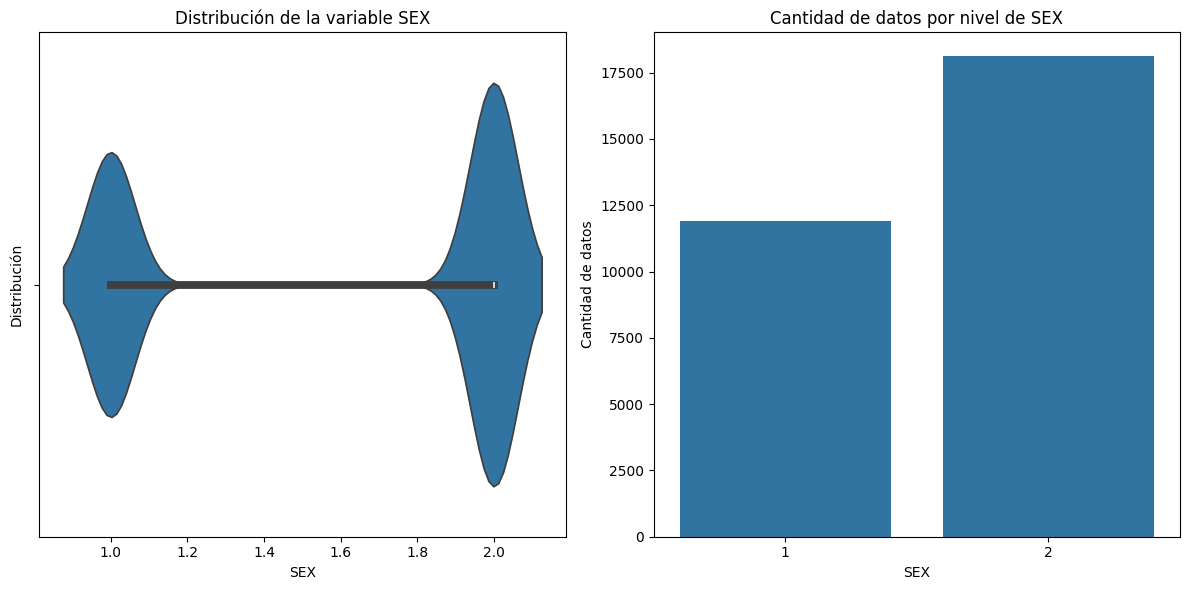

In [40]:
# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de violín
sns.violinplot(x="SEX", data=data_df, ax=ax1)
ax1.set_xlabel("SEX")
ax1.set_ylabel("Distribución")
ax1.set_title("Distribución de la variable SEX")

# Gráfico de conteo
sns.countplot(x="SEX", data=data_df, ax=ax2)
ax2.set_xlabel("SEX")
ax2.set_ylabel("Cantidad de datos")
ax2.set_title("Cantidad de datos por nivel de SEX")

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

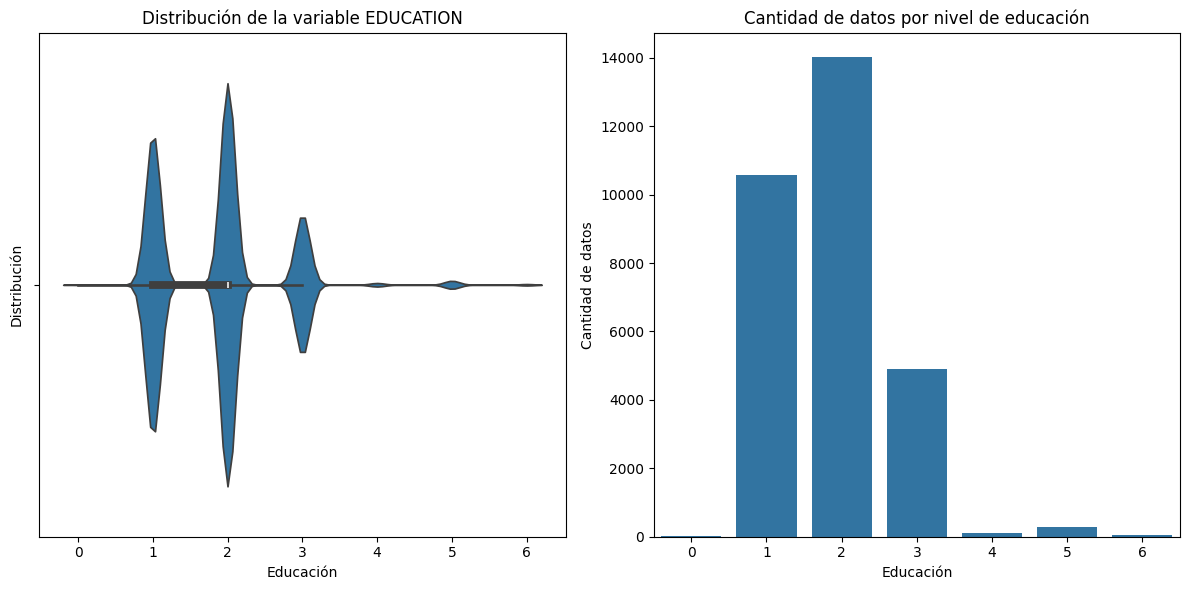

In [29]:
# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de violín
sns.violinplot(x="EDUCATION", data=data_df, ax=ax1)
ax1.set_xlabel("Educación")
ax1.set_ylabel("Distribución")
ax1.set_title("Distribución de la variable EDUCATION")

# Gráfico de conteo
sns.countplot(x="EDUCATION", data=data_df, ax=ax2)
ax2.set_xlabel("Educación")
ax2.set_ylabel("Cantidad de datos")
ax2.set_title("Cantidad de datos por nivel de educación")

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

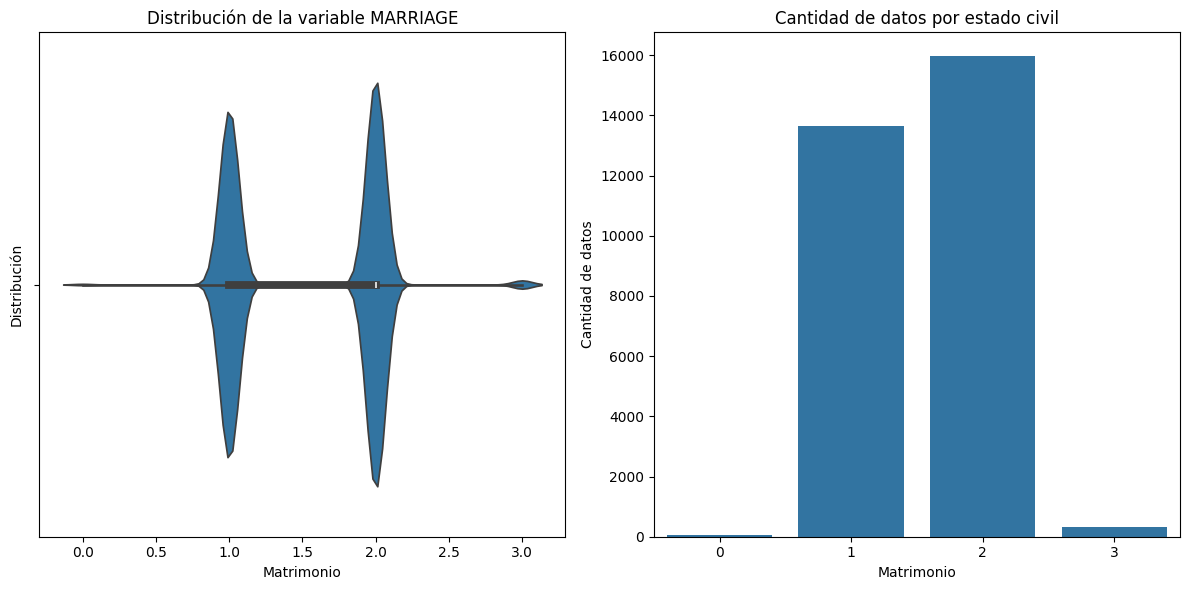

In [30]:
# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de violín
sns.violinplot(x="MARRIAGE", data=data_df, ax=ax1)
ax1.set_xlabel("Matrimonio")
ax1.set_ylabel("Distribución")
ax1.set_title("Distribución de la variable MARRIAGE")

# Gráfico de conteo
sns.countplot(x="MARRIAGE", data=data_df, ax=ax2)
ax2.set_xlabel("Matrimonio")
ax2.set_ylabel("Cantidad de datos")
ax2.set_title("Cantidad de datos por estado civil")

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()


no sé si esto vale la pena hacerlo 

In [45]:
# Copiar el DataFrame original data_df
data_df_modeling = data_df.copy()

# Obtener variables categóricas
variables_categoricas = ['MARRIAGE', 'EDUCATION', 'SEX']

# Convertir variables categóricas en variables dummy y agregarlas al DataFrame copiado
for variable in variables_categoricas:
    dummies = pd.get_dummies(data_df_modeling[variable], prefix=variable, drop_first=True)
    data_df_modeling = pd.concat([data_df_modeling, dummies], axis=1)
    data_df_modeling.drop(variable, axis=1, inplace=True)

# Ver las primeras filas del DataFrame copiado con las variables dummy
data_df_modeling.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,SEX_2
1,1,20000,24,2,2,0,0,0,0,3913,...,True,False,False,False,True,False,False,False,False,True
2,2,120000,26,0,2,0,0,0,2,2682,...,False,True,False,False,True,False,False,False,False,True
3,3,90000,34,0,0,0,0,0,0,29239,...,False,True,False,False,True,False,False,False,False,True
4,4,50000,37,0,0,0,0,0,0,46990,...,True,False,False,False,True,False,False,False,False,True
5,5,50000,57,0,0,0,0,0,0,8617,...,True,False,False,False,True,False,False,False,False,False


### 2.6 Convertir a 0 números negativos 

In [48]:
# Reemplazar todos los valores menores a 0 por 0 en el DataFrame con variables dummy
data_df_modeling = data_df_modeling.clip(lower=0)

# Ver las primeras filas del DataFrame con los valores ajustados
data_df_modeling.head()


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,SEX_2
1,1,20000,24,2,2,0,0,0,0,3913,...,True,False,False,False,True,False,False,False,False,True
2,2,120000,26,0,2,0,0,0,2,2682,...,False,True,False,False,True,False,False,False,False,True
3,3,90000,34,0,0,0,0,0,0,29239,...,False,True,False,False,True,False,False,False,False,True
4,4,50000,37,0,0,0,0,0,0,46990,...,True,False,False,False,True,False,False,False,False,True
5,5,50000,57,0,0,0,0,0,0,8617,...,True,False,False,False,True,False,False,False,False,False


In [49]:
data_df_modeling = data_df.copy()

## 2.7 Archivo Resultante

In [50]:
data_df_modeling.to_csv('clean_data.txt')